# TD1 - Bandits - Flavie Vampouille

Populating the interactive namespace from numpy and matplotlib
epoch: 999 -- mean reward: -0.0214667230086 -- percent optimal: 9.5

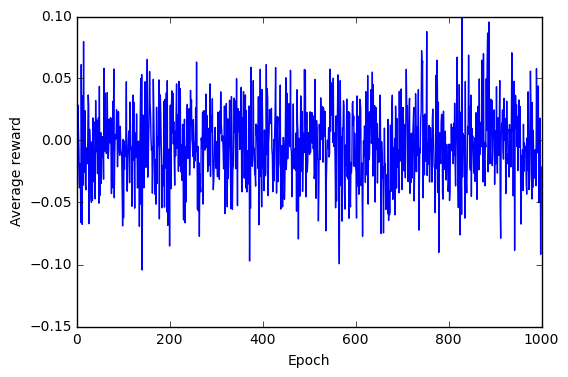

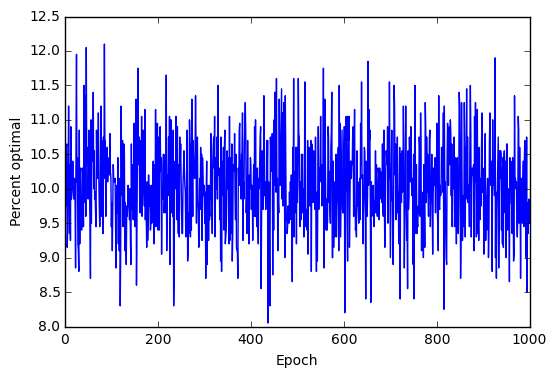

In [1]:
#### Bandit exercise ####

# README if libraries need to be installed 
# You need to install numpy and matplotlib using pip (or pip3).
# This can be done with the following commands (in a terminal in a Linux OS):
#   If running Python 2:
#    pip install numpy
#    pip install matplotlib
#   If running Python 3:
#    pip3 install numpy
#    pip3 install cairocffi
#    pip3 install matplotlib
# For this, 'pip' (or pip3) needs to be installed (which is usually already the case). If not, you can do it by installing classically python-dev (for pip) or python3-pip (for pip3), with your usual OS library management tool (yum, aptitude, apt-get, synaptic, ...). If using Python 3, you might need to install libffi-dev as well.
# This version was tested under Python 2.7.6 and under Python 3.4.3.

import numpy as np
import matplotlib.pyplot as plt
%pylab inline
import sys


# ne pas modifier

class Banditos:
    def __init__(self, N, k):
        self.cur = 0
        self.q_stars = np.random.randn(N, k)

    def select(self, n):
        self.cur = n

    def act(self, a):
        mean = self.q_stars[self.cur, a]
        reward = mean + np.random.randn()
        return reward


class randomAgent:
    def __init__(self, A):
        self.A = A

    def interact(self):
        return np.random.randint(0, self.A)

    def update(self, a, r):
        pass
    

"""
Create your own agent classes implementing
first the epsilon greedy agent, and then the
Softmax agent, optimisticEpsGreedyAgent
and UCBAgent.
To make your classes compatible with the
tester, they must exhibit a constructor of
the form
def __init__(self, A, ...):

with ... being other parameters of your choice,
a function
def interact(self):

that returns an action given the current state
of the bandit, and a function
def update(self, a, r):

that takes the action that was performed, the
reward that was obtained, and updates the state
of the bandit. The epsGreedyAgent is here to
help you get an idea on how to implement these
methods.

Once your implementation of an agent is complete,
you can test it by replacing randomAgent in
the AgentTester parameters in the main script below
by your own class, and give a table containing the
parameters you want to use as a dictionnary (e.g.
{'epsilon': 0.1}) as an argument.

The AgentTester will automatically test the performance
of your agent, will give you both the epochwise mean
reward and percentage of optimal action, an will
plot your results.

You may want to start by testing the epsilon greedy
policy with various values of epsilon, to get a grasp
of the results you are supposed to obtain.
"""

# Do not modify this class.


class AgentTester:
    def __init__(self, agentClass, N, k, iterations, params):
        self.iterations = iterations
        self.N = N
        self.agentClass = agentClass
        self.agentTable = []
        params['A'] = k
        for i in range(N):
            self.agentTable[len(self.agentTable):] = [agentClass(**params)]
        self.bandits = Banditos(self.N, k)
        self.optimal = np.argmax(self.bandits.q_stars, axis=1)

    def oneStep(self):
        rewards = np.zeros(self.N)
        optimals = np.zeros(self.N)
        for i in range(self.N):
            self.bandits.select(i)
            action = self.agentTable[i].interact()
            optimals[i] = (action == self.optimal[i]) and 1 or 0
            rewards[i] = self.bandits.act(action)
            self.agentTable[i].update(action, rewards[i])
        return rewards.mean(), optimals.mean() * 100

    def test(self):
        meanrewards = np.zeros(self.iterations)
        meanoptimals = np.zeros(self.iterations)
        for i in range(self.iterations):
            meanrewards[i], meanoptimals[i] = self.oneStep()
            display = '\repoch: {0} -- mean reward: {1} -- percent optimal: {2}'
            sys.stdout.write(display.format(i, meanrewards[i], meanoptimals[i]))
            sys.stdout.flush()
        return meanrewards, meanoptimals


# Modify only the agent class and the parameter dictionnary.

if __name__ == '__main__':
    tester = AgentTester(randomAgent, 2000, 10, 1000, {})
    
       # Do not modify.
    meanrewards, meanoptimals = tester.test()
    plt.figure(1)
    plt.plot(meanrewards)
    plt.xlabel('Epoch')
    plt.ylabel('Average reward')
    plt.figure(2)
    plt.xlabel('Epoch')
    plt.ylabel('Percent optimal')
    plt.plot(meanoptimals)
    plt.show()

### OptimisticEpsilonGreedy

epoch: 999 -- mean reward: 1.4053373622 -- percent optimal: 78.6

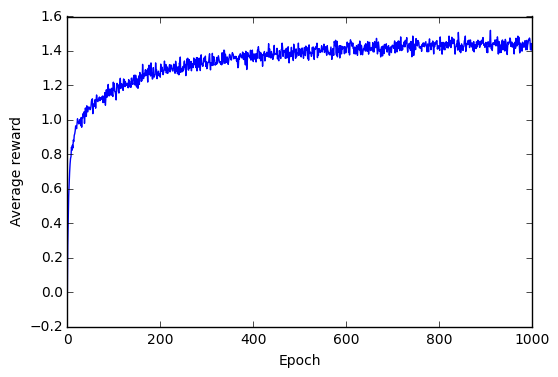

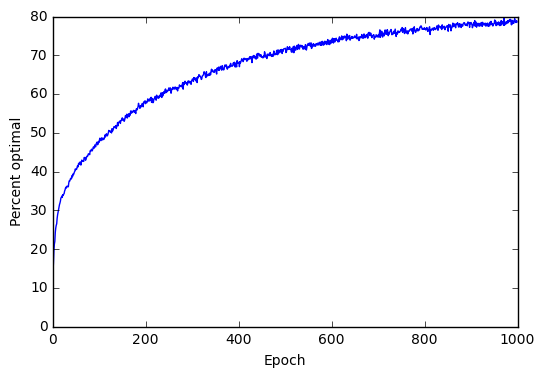

In [2]:
class epsilon_greedy:
    def __init__(self, A, epsilon):
        self.A = A                        # number of arms
        self.epsilon = epsilon
        self.mean_list = np.zeros(A)      # list of means, initialize null
        self.visit_list = np.zeros(A)     # list of visit, initialize null

    def interact(self):
        if np.random.uniform() < self.epsilon :
            return np.random.randint(0, self.A)
        else :
            return np.argmax(self.mean_list)

    def update(self, a, r):
        self.mean_list[a] = ( self.mean_list[a] * self.visit_list[a] + r ) / ( self.visit_list[a] + 1 )
        self.visit_list[a] += 1 
        pass
   

if __name__ == '__main__':
    tester = AgentTester(epsilon_greedy, 2000, 10, 1000, {'epsilon':0.05})
    
       # Do not modify.
    meanrewards, meanoptimals = tester.test()
    plt.figure(1)
    plt.plot(meanrewards)
    plt.xlabel('Epoch')
    plt.ylabel('Average reward')
    plt.figure(2)
    plt.xlabel('Epoch')
    plt.ylabel('Percent optimal')
    plt.plot(meanoptimals)
    plt.show()

### Softmax

epoch: 999 -- mean reward: 1.36949018888 -- percent optimal: 65.1

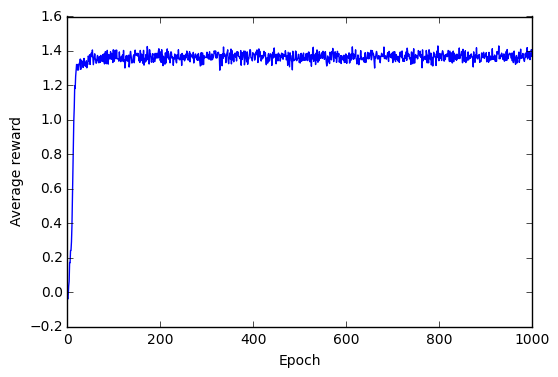

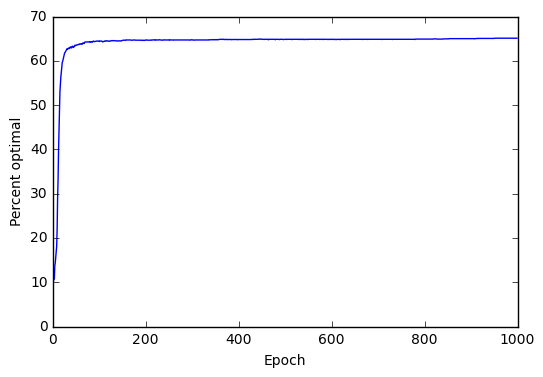

In [25]:
class softmaxAgent:
    def __init__(self, A, alpha):
        self.A = A
        self.alpha = alpha
        self.mean_list  = np.zeros(A)     # list of means
        self.visit_list = np.zeros(A)     # list of visit
        self.P = np.ones(A)              # softmax probability

    def interact(self):
        SumProba = np.cumsum(self.P)     # vector of cumulative probability
        return SumProba.searchsorted(np.random.uniform(0,SumProba[-1]))    # choose an arm randomly depending on the proba
                                                                           # note: 1 not reach so we take the last element np.random.uniform(0,SumProba[-1])
        
    def update(self, a, r):
        self.mean_list[a] = ( self.mean_list[a] * self.visit_list[a] + r ) / ( self.visit_list[a] + 1 )
        self.visit_list[a] += 1
        self.P[a] = np.exp(self.alpha * self.mean_list[a]) / sum(np.exp(self.alpha*self.mean_list))
        pass
    
if __name__ == '__main__':
    tester = AgentTester(softmaxAgent, 2000, 10, 1000, {'alpha':100})
    
       # Do not modify.
    meanrewards, meanoptimals = tester.test()
    plt.figure(1)
    plt.plot(meanrewards)
    plt.xlabel('Epoch')
    plt.ylabel('Average reward')
    plt.figure(2)
    plt.xlabel('Epoch')
    plt.ylabel('Percent optimal')
    plt.plot(meanoptimals)
    plt.show()

### UCB

epoch: 999 -- mean reward: 1.51340940818 -- percent optimal: 90.35

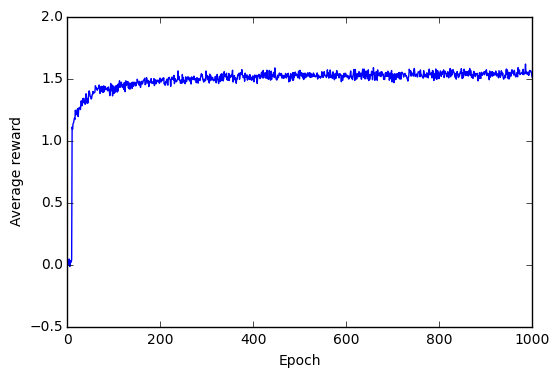

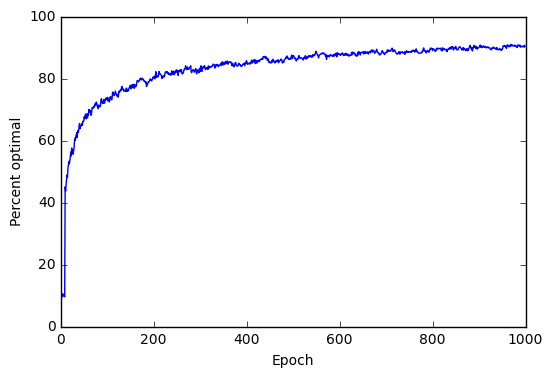

In [3]:
class UCB:
    def __init__(self, A, C):
        self.A = A
        self.mean_list = np.full(A,10)
        self.visit_list = np.zeros(A)     # number of visit
        self.regret = np.zeros(A)         # list of regret
        self.C = C                        # Barto et Sutton book formula
        
    def interact(self):
        return np.argmax(self.regret)

    def update(self, a, r):
        self.mean_list[a] = ( self.mean_list[a] * self.visit_list[a] + r ) / ( self.visit_list[a] + 1 )
        self.visit_list[a] += 1
        for i in xrange(self.A) :
            self.regret[i] = self.mean_list[i] + self.C * np.sqrt(2*np.log(sum(self.visit_list))/(self.visit_list[i]+1))
        pass
    
if __name__ == '__main__':
    tester = AgentTester(UCB, 2000, 10, 1000, {'C':1})
    
       # Do not modify.
    meanrewards, meanoptimals = tester.test()
    plt.figure(1)
    plt.plot(meanrewards)
    plt.xlabel('Epoch')
    plt.ylabel('Average reward')
    plt.figure(2)
    plt.xlabel('Epoch')
    plt.ylabel('Percent optimal')
    plt.plot(meanoptimals)
    plt.show()